In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline

### Read the dataset 

* from University of California Irvine Machine Learning Repository: [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
# Check the first message

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
# Check the second message

messages[1]

'ham\tOk lar... Joking wif u oni...'

In [5]:
# Check the last message

messages[-1]

'ham\tRofl. Its true to its name'

In [6]:
# Length of messages

len(messages)

5574

In [7]:
# Breakdown of collection of text or corpus

list1 = ['this is the place of encounter',
        'this is the place of surrneder',
        'do to me what you want Jesus']

for k, i in enumerate(list1):
    print(k, i)

0 this is the place of encounter
1 this is the place of surrneder
2 do to me what you want Jesus


### Corpus of the first 7 messages in dataset

In [8]:
## ...alongside the message number, we have:

for message_no, message in enumerate(messages[:7]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.




### Note:
* From the 'Corpus' above, we can tell that the messages are separated with tabs, thus a 'tab-separated-value (tsv)' file.
* first column   = label (ham or spam). ham and spam means 'good email' and 'bad email' respectively.
* second column = the message itself


In [9]:
# to further show that the 'messages' file is a tsv,
# let's check the first message


messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### Observation:

* We see that the string above starts with " __ham\t__ " meaning this is a 'good email', tab(__" \t "__) and then the message itself








* "Hence we will rather use -> pandas <- to work on the dataset rather than regular python"

### Read the dataset
* as a 'csv' file

In [10]:
messages2 = pd.read_csv(filepath_or_buffer = 'SMSSpamCollection', 
                        sep = '\t')

In [11]:
messages2



# To see the entire datafram

#pd.set_option("display.max_rows", None, "display.max_columns", None)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


__Rename the columns:__

In [12]:
messages2.columns = ['label', 'message']

In [13]:
messages2.head()


# this is a nice dataframe

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


# Exploratory Data Analysis
#### Statistical information

In [14]:
messages2.describe()

,label,message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


#### Observations:

* There are 5571 label counts (ham & spam) and 5571 messages counted
* There are 2 unique labels (ham -> good email, and spam -> bad email)
* There are 5168 unique messages and this makes sense to be less than the count (5571)
* ... because, we could have repetitions in the messages;
* ... In this case, there are 5571-5168 = 403 repeated messages
* The 'top' label (the most common label) is 'ham' with 4824 freq/repetitioins
* The 'top' message (the most common message) is "Sorry, I'll call later" with 30 freq/repetitions 

__Check the statistics of both labels i.e. 'spam' and 'ham' messages__

In [15]:
messages2.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#### Observations:

*For 'ham'*
* There are 4824 good emails of which 4515 are unique, which implies 309 repeated emails
* The 'top' message (the most common message) is "Sorry, I'll call later" and was repeated 30 times (i.e. frequency) 

*For 'spam'*
* There are 747 good emails of which 653 are unique, which implies 94 repeated emails
* The 'top' message (the most common message) is "Please call our customer service representative" and was repeated 4 times (i.e. frequency) 

### Balance the Dataset:

* We currently have an unbalanced dataset with 4824 good email (ham) and 747 bad emails (spam), which will make out prediction skewed towards 'ham'. We seek to balance the dataset by taking equal sample sizes of both 'ham' and 'spam'.

* Currently, the total email messages is 5,574 but after making the dataset balance, we expect 747 from each category making our total to be 1,494.


In [16]:
# Pull out all the 'ham' and 'spam' messages separately
ham_messages = messages2.loc[messages2['label'].isin(['ham'])]
spam_messages = messages2.loc[messages2['label'].isin(['spam'])]


# Now collect a random sample of 747 for 'ham'
ham_messages = ham_messages.sample(n = 747, replace = True)

# The 'spam' messages is already 747. So no extraction here

In [17]:
# Check both messages

ham_messages

,label,message
3574,ham,Yeah sure I'll leave in a min
111,ham,Going for dinner.msg you after.
3439,ham,"awesome, how do I deal with the gate? Charles ..."
4233,ham,My love ... I hope your not doing anything dra...
280,ham,You got called a tool?
...,...,...
587,ham,Pete can you please ring meive hardly gotany c...
2799,ham,I've told him that i've returned it. That shou...
3310,ham,Oh ho. Is this the first time u use these type...
1860,ham,"It could work, we'll reach a consensus at the ..."


In [18]:
spam_messages

,label,message
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,spam,FreeMsg Hey there darling it's been 3 week's n...
7,spam,WINNER!! As a valued network customer you have...
8,spam,Had your mobile 11 months or more? U R entitle...
10,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5536,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5546,spam,Had your contract mobile 11 Mnths? Latest Moto...
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...


#### Join the 'ham' and 'spam' to get a full dataset

* This will be the updated "messages2"

In [19]:
balanced_dataset = pd.concat([ham_messages, spam_messages])

# update 'messages2'
messages2 = balanced_dataset
messages2

,label,message
3574,ham,Yeah sure I'll leave in a min
111,ham,Going for dinner.msg you after.
3439,ham,"awesome, how do I deal with the gate? Charles ..."
4233,ham,My love ... I hope your not doing anything dra...
280,ham,You got called a tool?
...,...,...
5536,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5546,spam,Had your contract mobile 11 Mnths? Latest Moto...
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...


#### Shuffle the rows in the dataset

In [20]:
from sklearn.utils import shuffle

In [21]:
messages2 = shuffle(messages2)

messages2

,label,message
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
2287,ham,Alex knows a guy who sells mids but he's down ...
718,spam,You have WON a guaranteed £1000 cash or a £200...
776,ham,Why don't you go tell your friend you're not s...
5380,spam,You have 1 new message. Call 0207-083-6089
...,...,...
3511,ham,I'm serious. You are in the money base
1767,ham,"K, want us to come by now?"
5179,ham,Babe! I fucking love you too !! You know? Fuck...
2811,ham,Thinkin about someone is all good. No drugs fo...


__Re-check the statistics of both labels i.e. 'spam' and 'ham' messages__

In [22]:
messages2.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham       747    681  I cant pick the phone right now. Pls send a me...    6
spam      747    653  Please call our customer service representativ...    4

# Now let us do some Feature Engineering

##### Definition:

**Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive. **

(source: https://towardsdatascience.com/exploratory-data-analysis-feature-engineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298)

## How long are the text messages?

In [23]:
# Create a new column on the dataset to account for email/message length


messages2['length'] = messages2['message'].apply(len)

<ipython-input-23-ce5f36531d15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages2['length'] = messages2['message'].apply(len)


In [24]:
messages2

,label,message,length
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
2287,ham,Alex knows a guy who sells mids but he's down ...,110
718,spam,You have WON a guaranteed £1000 cash or a £200...,145
776,ham,Why don't you go tell your friend you're not s...,145
5380,spam,You have 1 new message. Call 0207-083-6089,42
...,...,...,...
3511,ham,I'm serious. You are in the money base,38
1767,ham,"K, want us to come by now?",26
5179,ham,Babe! I fucking love you too !! You know? Fuck...,157
2811,ham,Thinkin about someone is all good. No drugs fo...,52


### Visualize the length of the messages

#### Check the distribution of message length

* Note that the bin size has effect on the nature of the distribution
* For more detail, you can increase the bin-size

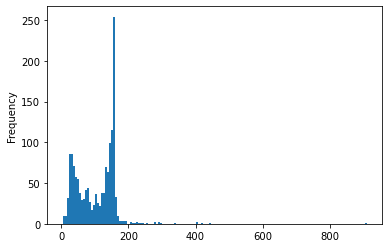

In [25]:
messages2['length'].plot.hist(bins = 150)

#plt.grid()

#### Observations:

* We can observe that there are a few outliers, implying that there are 
* ...some messages that are really long, having above 800 characters (including space)


## What are the maximum and minimum email message length ?

In [26]:
messages2['length'].describe()

count    1494.000000
mean      105.139224
std        59.720117
min         4.000000
25%        50.000000
50%       119.500000
75%       152.750000
max       910.000000
Name: length, dtype: float64

#### Observations:

* The maximum email message is 790 characters long
* The minimum email message is just 2 character long

## Identify the email message of the maximum =910 character long

In [27]:
messages2[messages2['length'] == 790]

,label,message,length


##### Print the entire "message" alone

In [28]:
messages2[messages2['length'] == 790]['message'].iloc[0]

IndexError: single positional indexer is out-of-bounds

## Identify the email message of the minimum =2 character long

In [ ]:
messages2[messages2['length'] == 2]

##### Print the entire "message" alone

In [ ]:
# we have 3 of this messages. 
# We want to print all 3

total_messages = len(messages2[messages2['length'] == 2])

for i in range(total_messages):
    print(messages2[messages2['length'] == 2]['message'].iloc[i])

## Is message length a distinguishing feature between 'ham' and 'spam'?

## can we use length to determine a spam or ham email?

In [ ]:
# use pandas version of facet-grid (seaborn can do this too)

messages2.hist(column  = 'length', 
               by      = 'label', 
               bins    =  200, 
               figsize = (12,4))

#### Observations:

* 'ham' emails are centered around 50 characters with a range of 0 to 200
* 'spam' emails are centered around 150 characters.

## Conclusion on email message length:

* By visualization, we can tell that 'length of emails/messages' can be used
* ... as a good feature to distinguish 'ham' and 'spam' emails



* The margin is really wide. By averages: 50 - 150 (or 1:3 -ham:spam)

# Pre-processing the text (email messages)

* We want to convert of corpus of strings to a vector format using the Bag of words approach (i.e. each unique word in a text is represented by one number)

* So, we basically are converting the raw messages (a sequence of characters) into vectors (a sequence of numbers)

* ...to do this, we split the words in a string and store it in a list and remove stop words (like "the", "is", "and")

In [ ]:
import string

In [ ]:
# check punctuations in string-library

string.punctuation

In [ ]:
# import the stop words

from nltk.corpus import stopwords

#### How many common stopwords do we have in this library?

In [ ]:
len(stopwords.words('english'))

##### Check the list of these common English "stop-words"

In [ ]:
stopwords.words('english')

In [ ]:
# Recall original messages

messages2.head()

### Tokenize these mesages
* This converting a normal text string into a list of tokens (cleaned version of the words we actually want)
* This process removes the stop words and gives us a list of the words of interest


* Next, let us define a function to do this

In [ ]:
def text_process(mess):
    
    """
    1. remove punctuations
    2. remmove stop words
    3. return list of clean text words
    
    """
    
    # using list comprehension
    no_punctuation = [char for char in mess if char not in string.punctuation]
    
    
    no_punctuation = ''.join(no_punctuation)
    
    clean_text = [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]
    
    return clean_text
    

In [ ]:
messages2['message'].apply(text_process)

In [ ]:
# grab the first 5

messages2['message'].head(5).apply(text_process)

## Vectorization

* convert each message into a vector that machine learning (or the SciKit Learn algorithms) models  can understand

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

### Let us see how this "CountVectorizer" works:

In [ ]:
bag_of_words_transformer = CountVectorizer(analyzer = text_process).fit(messages2['message'])

__Bag of word counts for a sample email:__

In [ ]:
# create an object to store the sample message, say 'email_sample' having index 2412

email_sample = messages2['message'][2412]
email_sample

In [ ]:
bag_of_words_3 = bag_of_words_transformer.transform([email_sample])

In [ ]:
print(bag_of_words_3)

#### Observation:
* This means that there are 14 unique words in sample message, after removing the stop words, three of these unique words appeared twice and we can easily confirm that using the "index" under the feature names (check next code...)

In [ ]:
bag_of_words_transformer.get_feature_names()[3037]

In [ ]:
bag_of_words_transformer.get_feature_names()[4597]

#### Apply the ".transform" to the entire 'message' column in the dataframe rather one sample message (illustrated above)

In [ ]:
# For ease:
bow_transformer = bag_of_words_transformer

In [ ]:
messages2_bow = bow_transformer.transform(messages2['message'])

In [ ]:
messages2_bow

#### Observation:
* We see that the vector of the entire email message is represented as a "Sparse Matrix" (a matrix that contains more number of ZERO values than NON-ZERO values)

* We have 18038 elements that are compressed in row format. These are the number of NON-ZERO elements 

Source/more on __Sparse Matrix__: http://www.btechsmartclass.com/data_structures/sparse-matrix.html#:~:text=Sparse%20matrix%20is%20a%20matrix,only%2010%20non%2Dzero%20elements.

#### Shape of Sparse Matrix

In [ ]:
print(messages2_bow.shape)

### How many non-zero elements in the Sparse Matrix do we have?

In [ ]:
print(messages2_bow.nnz)

### What is the Sparsity?
* This is basically comparing the number of non-zero elements (messages) to the zero elements. 

* We use a formula to do this: (number of zero elements/total number of elements (m-by-n matrix) )

* The density is 1 - sparsity. This compares the number of zero elements to the non-zero elements

In [ ]:
sparsity = (messages2_bow.nnz / (messages2_bow.shape[0] * messages2_bow.shape[1]))

sparsity

print("Sparsity in percentage is {}% ".format(round(sparsity*100.0, 4)))

print("\n")

print("Density in percentage is {} % ".format(1 - round(sparsity*100.0, 4)))

#### Observation:
* With such a sparsity value, it is clear that the number of zeros in the matrix is high. This is evident in the high value of the Density (closer to 1)

## Step 2 and Step 3:

* We use the TF-IDF
* __TF-IDF__ means __Term Frequency- Inverse Document Frequency:__ The _tf-idf_ weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

* The __tf-idf weight__ is composed by two(2) terms: 
    * the first computes the normalized Term Frequency (TF): the number of times a word appears in a document, divided by the total number of words in that document (i.e. email)
    
        * **TF('word') = (Number of times term 'word' appears in a document) / (Total number of terms in the document).**
                
    * the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents (e.g. emails) in the corpus divided by the number of documents where the specific term appears.
        * **IDF('word') = log_e(Total number of documents / Number of documents with term 'word' in it).**

* Therefore, final value is gotten as:
                     **TF-IDF = TF('word') * IDF('word')**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

### ==>> Let us see how this "Tfidf Transformer" works:

In [ ]:
# For ease, let:

bow_transformer = bag_of_words_transformer

__Apply the ".transform" to the entire 'message' column in the dataframe rather one sample message (illustrated above)__

In [ ]:
messages2_bow = bow_transformer.transform(messages2['message'])

In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages2_bow)

In [ ]:
# Transform just one message to get the Inverse Document Frequency and
# Term Frequency (TF) relationship for email_sample (i.e. example used previously)


tfidf3 = tfidf_transformer.transform(bag_of_words_3)

In [ ]:
print(tfidf3)

### Observation:
   * The numbers are the weight values for each of these words versus the actual document
   * Recall, these words can be seen using their index, as previosuly illustrated

In [ ]:
# Recall the email_sample under consideration

email_sample

### What is the term frequency- inverse document frequency weight of 'CHAT' in sample_email ?

In [ ]:
# First, check which index represents 'CHAT'

bag_of_words_transformer.vocabulary_['CHAT']

### Observation:
* The result vectors are arranged in descending order of the index

### Result:
The term frequency-inverse document frequency weight of 'say' in email3 is gotten from

   _(0, 977)  -->	0.23248663263329686_ and is approximately __0.2325__

# Now, let's explore OUTSIDE of email_sample:

#### What is the Inverse Document Frequency (IDF) of "house" ?

In [ ]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['house']]

In [ ]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['pictures']]

## Train the 'spam' and 'ham' classifier
* Many other classifiers can be used but we want to use the Naive-Bayes classifier


In [ ]:
# First, we convert the entire bag of word corpus into a tfidf corpus at once.
# This similar to what we did with bow_of_words_3 (for email_sample)



tfidf_all_messages = tfidf_transformer.transform(messages2_bow)

### ==>> Let us see how this "MultinomialNB" works:

In [ ]:
spam_detect_model = MultinomialNB().fit(X = tfidf_all_messages,
                                        y = messages2['label'])

__Classify a single random message to see how the prediction will do:__

In [ ]:
spam_detect_model.predict(tfidf3)

In [ ]:
spam_detect_model.predict(tfidf3)[0]

### Result:
* The model detects that the 'email_sample' message will be 'ham' (good message)

* Check if the above prediction is true:

In [ ]:
messages2['label'][2412]  # from the original

### Result:
* Yes, our model seems to be predicting correctly.

## Now, let's do this prediction for all the emails in the dataset

In [ ]:
predict_all = spam_detect_model.predict(tfidf_all_messages)

In [ ]:
predict_all

### Split data to Training and Testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(messages2['message'], 
                                                    messages2['label'], 
                                                    test_size    = 0.20,   # using 20% as test_data
                                                    random_state = 42)
# Notes:
# X represents 'message'
# y represents 'label'

### Notes:
* Now we would use "Pipeline" rather doing all the long previous steps we went through
* To do this:
    * Pass in a list of _everything_ you want to do into the 'Pipeline'
    * _everything_ here would mean a tuple having ('name of step', 'calculation/function of that step')


In [ ]:
pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('Train on Model', MultinomialNB())  # you can change this 'Classifier' e.g. to RandomForestClassfier etc
])

In [ ]:
model = pipeline.fit(X_train, y_train)
model

### Do the Prediction of the Test Data

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

### Confusion Matrix
                                                  Predicted
                     -------------------------------------------------------------------
                    |       ham                        |        spam                   
           |-----------------------------------------------------------------------------
    Actual |ham     |  True ham  (True Negative)       |    False spam (False Positive)   
           |spam    |  False ham (False Negative)      |    True spam  (True Positive)

In [ ]:
print(confusion_matrix(y_true = y_test, 
                       y_pred = predictions))

### Classification report

In [ ]:
print(classification_report(y_true = y_test, 
                            y_pred = predictions))

### Results:

* Generally, the accuracy of the model seems very good being 95% accurate. But, our focus will not be on _Accuracy_, rather will be on _Precision_.


* **<u>Precision:</u>** is a good measure to determine, when we prioritize the costs of False-Positive. If we take Positive to mean 'spam' and Negative to mean 'ham'; then a false positive would mean that a ham or good email (actual negative) has been identified as spam or bad email (predicted spam). **_The result of this becomes that the email user might lose important emails if the precision is not high for the model._**


* ham:
    * The _Precision_ is 97% which tells very well on our model in classifying good emails.
   
    
* spam:
    * The _Precision_ is 94% which tells us that our model is doing just fine in detecting spam emails, although not as 'ham'

### Assumming we wanted to predict new email

In [ ]:
new_email = ['I am so grateful and excited. I got my the Job! Hurray!!!!!!']

pipeline.predict(new_email)

In [ ]:
new_email2 = ['We will give you $1,000 for sending an e-mail to your friends.  AB Mailing, Inc. is proud to anounce the start of a new contest.  Each day untilJanuary, 31 1999, one lucky Internet or AOL user who forwards our advertisement to their friends will be randomly picked to receive $1,000!  You could be the winner!']

pipeline.predict(new_email2)





# This example is from MIT: http://web.mit.edu/network/spam/examples/
# Specifically example "Jan 1999"

## Note: 

* We can change the 'Train on Model -Classifier' (currently Naive Bayes) to other types of classifiers or ensemble methods
    * Other Classifiers:
        * Decision Tree,
        * K-Nearest Neigbor
        * Artificial Neural Networks
        * Logistic Regression
        * Support Vector Machine etc
        * Ensemble methods:
                * Random Forest
                * Bagging etc

### Using the *Logistic Regression* classifier:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('Train on Model', LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_true = y_test, 
                            y_pred = predictions))

### Using an Ensemble method of classifier: *_Random Forest_* classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('Train on Model', RandomForestClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_true = y_test, 
                            y_pred = predictions))

# Concluding Thoughts:
* Some Data Scientist prefer to use an ensembler method for classification often because _it is a set of classifiers whose individual decisions are combined in some way to classify new examples_. 


* From our few trials of both _single classifiers_ and _set of classifiers_ (ensembler method) does well. I will give preference to the Logistic Regression Classifier, simply because it balances giving a higher prediction for 'spam' and not lowering the prediction for 'ham' so much. Recall our attention is still on _Precision_.


* I did not choose RandomForestClassifier as my preferred because, although the 'spam'-detection precision is very high, I think, it lowered so much of the 'ham' precision. Again, this is just my preference.


* As a future step, I will want to try other classifiers. In my opinion, choosing the classifier would depend mostly on the Data Scientist or Team  and what they want to achieve.